In [43]:
%pwd 
%cd yolov5/
!pip install -r requirements.txt

C:\Users\AI\Auto_Farming\yolov5


- <font color=red>cv2.imwrite(“파일명.확장자”, 프레임이미지, 옵션)</font>
  - params=[cv2.IMWRITE_PNG_COMPRESSION, 0]) : 압축 하지 않는 PNG, 세 번째 파라미터는 압축률로 0~9까지 설정 가능 (0은 압축 없음)

In [4]:
import os
import glob
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

exp_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/"
path = 'C:/Users/AI/Auto_Farming/yolov5/'
weight = 'C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'
source = 'C:/Users\AI/Auto_Farming/image/capture.png' 
save_img = 'C:/Users\AI/Auto_Farming/image/capture.png'
coordinate_path = "C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/"
frame_img_path = "C:/Users/AI/Auto_Farming/image/capture.png"

In [51]:
cap = cv2.VideoCapture(1)
while True :
    try:
        os.unlink(exp_path+"labels/capture.txt")
    except:
        with open("C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/capture.txt", 'w') as f:
            f.write('')
    ret, frame = cap.read()
    if not ret:
        break 
    resize_frame = resize_frame[:,:480]
    key = cv2.waitKey(99)
    cv2.imshow("test", resize_frame)
    cv2.imwrite(save_img, resize_frame,
               params=[cv2.IMWRITE_PNG_COMPRESSION, 0])
    !python {path}detect3.py --weight {weight} --img 640 --source {source} --save-txt --exist-ok --hide-conf --hide-labels
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break 
cap.release()
cv2.destroyAllWindows()


detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 6 Ginsengs, 7 heads, 593.4ms
Speed: 4.0ms pre-process, 593.4ms inference, 11.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

detect3: weights=['C:/Users/AI/Auto_Farming/yolov5/runs/train/insam_yolov5s_results/weights/best.pt'], source=C:/Users\AI/Auto_Farming/image/capture.png, data=data\coco128.yaml, imgsz=[1088, 1088], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=3, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v6.2-219-ga83d2a5 Python-3.9.12 torch-1.12.1 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7015519 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\AI\Auto_Farming\image\capture.png: 1088x1088 10 Ginsengs, 10 heads, 595.4ms
Speed: 4.0ms pre-process, 595.4ms inference, 1.0ms NMS per image at shape (1, 3, 1088, 1088)
Results saved to runs\detect\exp
225 labels saved to runs\detect\exp\labels
detect3: weights=['C:/Users/AI/Auto_Far

In [54]:


with open(coordinate_path+"capture.txt", "r") as f:
    txt = f.readlines()  

gc, hc, ga, da, min_gl, a = [], [], [], [], 640, 0
[gc.append(i) if i[0] == '0' else hc.append(i) for i in txt]

gn, hn, p = len(gc), len(hc), 0

for i in range(gn):
    g = gc[i][2:-1].split(' ')
    gltx, glty, grbx, grby = int(g[0]), int(g[1]), int(g[2]), int(g[3])
    lt, rt, lb, rb = [gltx, glty], [grbx, glty], [gltx, grby], [grbx, grby]
    globals()["g{}".format(i)] = [lt, rt, lb, rb]

    for j in range(hn):
        h = hc[j][2:-1].split(' ')
        hltx, hlty, hrbx, hrby = int(h[0]), int(h[1]), int(h[2]), int(h[3])
        globals()["h{}".format(j)] = [int((hltx+hrbx)/2), int((hlty+hrby)/2)]
        if (globals()[f"g{i}"][3][0] > globals()[f"h{j}"][0] > globals()[f"g{i}"][0][0])\
        and (globals()[f"g{i}"][3][1] > globals()[f"h{j}"][1] > globals()[f"g{i}"][0][1]):
            globals()["g{}".format(i)].append(globals()["h{}".format(j)])

    ga.append(globals()["g{}".format(i)])

for i in ga:
    if len(i) == 5:
        da.append(i)
        
# da=(1,2,3,4) # 개체수 없는 시나리오


if len(da) <= 5:
    p = 1
else: 
    for v in da:
        if min_gl > v[0][0]:
                min_gl = v[0][0]   
    for i,value in enumerate(da):
        if min_gl == value[0][0]:
            globals()["g{}".format(i)] = np.array(globals()["g{}".format(i)])
            best = globals()["g{}".format(i)]
            alt = abs(globals()["g{}".format(i)][0]-globals()["g{}".format(i)][-1])
            art = abs(globals()["g{}".format(i)][1]-globals()["g{}".format(i)][-1])
            alb = abs(globals()["g{}".format(i)][2]-globals()["g{}".format(i)][-1])
            arb = abs(globals()["g{}".format(i)][3]-globals()["g{}".format(i)][-1])
            altu, artu = int(math.sqrt((alt[0]**2)+(alt[1]**2))), int(math.sqrt((art[0]**2)+(art[1]**2)))
            albu, arbu = int(math.sqrt((alb[0]**2)+(alb[1]**2))), int(math.sqrt((arb[0]**2)+(arb[1]**2)))
            bgc = {'LT':altu, 'RT':artu, 'LB':albu, 'RB':arbu}
            bgc_sorted=sorted(bgc.items(), key=lambda x:x[1])
            if bgc_sorted[1][1] - bgc_sorted[0][1] < 20:
                if bgc_sorted[0][0] == 'RT' and bgc_sorted[1][0] == 'RB':
                    a=0
                elif bgc_sorted[1][0] == 'RT' and bgc_sorted[0][0] == 'RB':
                    a=0
                elif bgc_sorted[0][0] == 'LT'and bgc_sorted[1][0] == 'RT': 
                    a=90
                elif bgc_sorted[1][0] == 'LT'and bgc_sorted[0][0] == 'RT':
                    a=90
                elif bgc_sorted[0][0] == 'LT' and bgc_sorted[1][0] == 'LB':
                    a=180
                elif bgc_sorted[1][0] == 'LT' and bgc_sorted[0][0] == 'LB':
                    a=180
                elif bgc_sorted[0][0] == 'LB' and bgc_sorted[1][0] == 'RB': 
                    a=270
                elif bgc_sorted[1][0] == 'LB' and bgc_sorted[0][0] == 'RB':
                    a=270
            else:
                if bgc_sorted[0][0] == 'RT':
                    a=45
                elif bgc_sorted[0][0] == 'LT':
                    a=135
                elif bgc_sorted[0][0] == 'LB': 
                    a=225
                elif bgc_sorted[0][0] == 'RB':
                    a=315

print(f'정상 검출 갯수 : {len(da)}')
print('피더 작동') if p==1 else print('피더 작동 안함')
print(f'그리퍼 각도 : {a}')
print(f'좌표 : {best[-1][0]}, {best[-1][1]}')



정상 검출 갯수 : 10
피더 작동 안함
그리퍼 각도 : 180
좌표 : 141, 1024


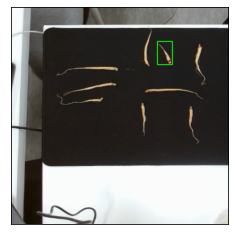

In [41]:
best=g0

frame_img = cv2.imread(frame_img_path, cv2.IMREAD_COLOR)
frame_img = cv2.cvtColor(frame_img, cv2.COLOR_BGR2RGB)
frame_img = cv2.rectangle(frame_img, (best[0][0], best[0][1]), (best[3][0], best[3][1]),(0,255,0), 3)
frame_img = cv2.circle(frame_img, (best[-1][0],best[-1][1]),5,(255,0,0), -1)
plt.xticks([]); plt.yticks([])
plt.imshow(frame_img)

In [19]:
gc

['0 725 175 799 290\n',
 '0 651 107 702 303\n',
 '0 131 984 424 1080\n',
 '0 638 472 676 645\n',
 '0 216 444 464 494\n',
 '0 210 295 532 346\n',
 '0 655 401 961 480\n',
 '0 906 177 963 397\n',
 '0 238 378 531 443\n',
 '0 874 485 930 685\n']

In [20]:
hc

['1 123 1011 160 1037\n',
 '1 658 266 690 301\n',
 '1 772 255 796 289\n',
 '1 922 184 950 218\n',
 '1 430 450 458 475\n',
 '1 659 409 693 432\n',
 '1 882 492 900 522\n',
 '1 489 377 526 397\n',
 '1 502 298 533 324\n',
 '1 642 477 662 511\n']

In [53]:
with open("C:/Users/AI/Auto_Farming/yolov5/runs/detect/exp/labels/capture.txt", 'w') as f:
    f.write('')

In [12]:
da

[[[725, 175], [799, 175], [725, 290], [799, 290], [784, 272]],
 [[651, 107], [702, 107], [651, 303], [702, 303], [674, 283]],
 [[131, 984], [424, 984], [131, 1080], [424, 1080], [141, 1024]],
 [[638, 472], [676, 472], [638, 645], [676, 645], [652, 494]],
 [[216, 444], [464, 444], [216, 494], [464, 494], [444, 462]],
 [[210, 295], [532, 295], [210, 346], [532, 346], [517, 311]],
 [[655, 401], [961, 401], [655, 480], [961, 480], [676, 420]],
 [[906, 177], [963, 177], [906, 397], [963, 397], [936, 201]],
 [[238, 378], [531, 378], [238, 443], [531, 443], [507, 387]],
 [[874, 485], [930, 485], [874, 685], [930, 685], [891, 507]]]